In [76]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, mean_absolute_percentage_error

# Set the style for seaborn
sns.set(style="whitegrid")


In [78]:
# Load the data
file_path = 'AnomaData.xlsx'  # Replace with your actual file path
data = pd.read_excel(file_path, sheet_name='Sheet1')


In [79]:
print(data.head())


                 time  y        x1        x2        x3         x4        x5  \
0 1999-05-01 00:00:00  0  0.376665 -4.596435 -4.095756  13.497687 -0.118830   
1 1999-05-01 00:02:00  0  0.475720 -4.542502 -4.018359  16.230659 -0.128733   
2 1999-05-01 00:04:00  0  0.363848 -4.681394 -4.353147  14.127997 -0.138636   
3 1999-05-01 00:06:00  0  0.301590 -4.758934 -4.023612  13.161566 -0.148142   
4 1999-05-01 00:08:00  0  0.265578 -4.749928 -4.333150  15.267340 -0.155314   

          x6        x7        x8  ...        x51        x52       x54  \
0 -20.669883  0.000732 -0.061114  ...  29.984624  10.091721 -4.936434   
1 -18.758079  0.000732 -0.061114  ...  29.984624  10.095871 -4.937179   
2 -17.836632  0.010803 -0.061114  ...  29.984624  10.100265 -4.937924   
3 -18.517601  0.002075 -0.061114  ...  29.984624  10.104660 -4.938669   
4 -17.505913  0.000732 -0.061114  ...  29.984624  10.109054 -4.939414   

         x55        x56       x57       x58       x59       x60  y.1  
0 -24.590146  1

In [81]:
# Check the shape (rows, columns) of the DataFrame
print(f'Data shape: {data.shape}')

# Check column names
print(f'Column names: {data.columns}')

# Check data types of columns
print(f'Data types:\n{data.dtypes}')


Data shape: (18398, 62)
Column names: Index(['time', 'y', 'x1', 'x2', 'x3', 'x4', 'x5', 'x6', 'x7', 'x8', 'x9',
       'x10', 'x11', 'x12', 'x13', 'x14', 'x15', 'x16', 'x17', 'x18', 'x19',
       'x20', 'x21', 'x22', 'x23', 'x24', 'x25', 'x26', 'x27', 'x28', 'x29',
       'x30', 'x31', 'x32', 'x33', 'x34', 'x35', 'x36', 'x37', 'x38', 'x39',
       'x40', 'x41', 'x42', 'x43', 'x44', 'x45', 'x46', 'x47', 'x48', 'x49',
       'x50', 'x51', 'x52', 'x54', 'x55', 'x56', 'x57', 'x58', 'x59', 'x60',
       'y.1'],
      dtype='object')
Data types:
time    datetime64[ns]
y                int64
x1             float64
x2             float64
x3             float64
             ...      
x57            float64
x58            float64
x59            float64
x60            float64
y.1              int64
Length: 62, dtype: object


In [40]:
# Basic overview of the data
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18398 entries, 0 to 18397
Data columns (total 62 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   time    18398 non-null  datetime64[ns]
 1   y       18398 non-null  int64         
 2   x1      18398 non-null  float64       
 3   x2      18398 non-null  float64       
 4   x3      18398 non-null  float64       
 5   x4      18398 non-null  float64       
 6   x5      18398 non-null  float64       
 7   x6      18398 non-null  float64       
 8   x7      18398 non-null  float64       
 9   x8      18398 non-null  float64       
 10  x9      18398 non-null  float64       
 11  x10     18398 non-null  float64       
 12  x11     18398 non-null  float64       
 13  x12     18398 non-null  float64       
 14  x13     18398 non-null  float64       
 15  x14     18398 non-null  float64       
 16  x15     18398 non-null  float64       
 17  x16     18398 non-null  float64       
 18  x17   

In [41]:
# Descriptive statistics for the data
data.describe()


,y,x1,x2,x3,x4,x5,x6,x7,x8,x9,...,x51,x52,x54,x55,x56,x57,x58,x59,x60,y.1
count,18398.000000,18398.000000,18398.000000,18398.000000,18398.000000,18398.000000,18398.000000,18398.000000,18398.000000,18398.000000,...,18398.000000,18398.000000,18398.000000,18398.000000,18398.000000,18398.000000,18398.000000,18398.000000,18398.000000,18398.000000
mean,0.006740,0.011824,0.157986,0.569300,-9.958345,0.006518,2.387533,0.001647,-0.004125,-0.003056,...,-3.357339,0.380519,0.173708,2.379154,9.234953,0.233493,-0.001861,-0.061522,0.001258,0.001033
std,0.081822,0.742875,4.939762,5.937178,131.033712,0.634054,37.104012,0.108870,0.075460,0.156047,...,348.256716,6.211598,3.029516,67.940694,81.274103,2.326838,0.048732,10.394085,0.004721,0.032120
min,0.000000,-3.787279,-17.316550,-18.198509,-322.781610,-1.623988,-279.408440,-0.429273,-0.451141,-0.120087,...,-3652.989000,-187.943440,-8.210370,-230.574030,-269.039500,-12.640370,-0.149790,-100.810500,-0.012229,0.000000
25%,0.000000,-0.405681,-2.158235,-3.537054,-111.378372,-0.446787,-24.345268,-0.058520,-0.051043,-0.059966,...,29.984624,-3.672684,0.487780,-40.050046,-45.519149,-1.598804,0.000470,0.295023,-0.001805,0.000000
50%,0.000000,0.128245,-0.075505,-0.190683,-14.881585,-0.120745,10.528435,-0.009338,-0.000993,-0.030057,...,29.984624,0.294846,0.702299,17.471317,1.438806,0.085826,0.012888,0.734591,0.000710,0.000000
75%,0.000000,0.421222,2.319297,3.421223,92.199134,0.325152,32.172974,0.060515,0.038986,0.001990,...,29.984624,5.109543,2.675751,44.093387,63.209681,2.222118,0.020991,1.266506,0.004087,0.000000
max,1.000000,3.054156,16.742105,15.900116,334.694098,4.239385,96.060768,1.705590,0.788826,4.060033,...,40.152348,14.180588,6.637265,287.252017,252.147455,6.922008,0.067249,6.985460,0.020510,1.000000


In [42]:
# Check for missing values
missing_values = data.isnull().sum()
print("Missing values:\n", missing_values)


Missing values:
 time    0
y       0
x1      0
x2      0
x3      0
       ..
x57     0
x58     0
x59     0
x60     0
y.1     0
Length: 62, dtype: int64


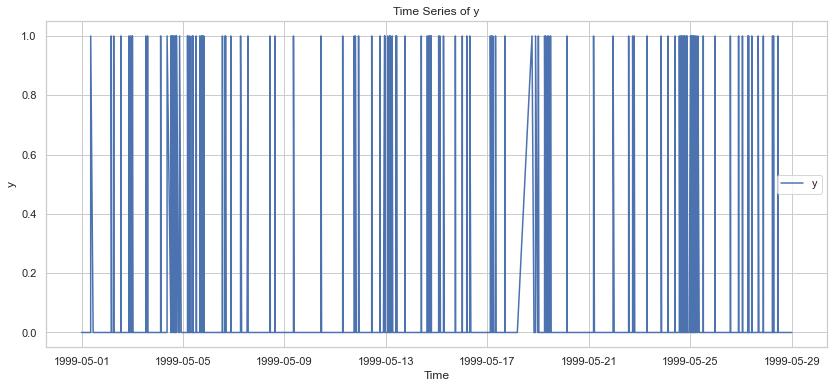

In [43]:
# Time series plot for the 'y' variable
plt.figure(figsize=(14, 6))
plt.plot(data['time'], data['y'], label='y')
plt.xlabel('Time')
plt.ylabel('y')
plt.title('Time Series of y')
plt.legend()
plt.show()


In [44]:
# Function to identify outliers based on IQR
def identify_outliers(df, features):
    outliers = {}
    for feature in features:
        Q1 = df[feature].quantile(0.25)
        Q3 = df[feature].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        outliers[feature] = df[(df[feature] < lower_bound) | (df[feature] > upper_bound)]
    return outliers

# Select features to check for outliers
selected_features = ['x1', 'x2', 'x3', 'x4', 'x5']
outliers = identify_outliers(data, selected_features)

# Display outliers
for feature, outlier_data in outliers.items():
    print(f"Outliers in {feature}:\n", outlier_data)


Outliers in x1:
                      time  y        x1        x2        x3          x4  \
199   1999-05-01 06:38:00  0  1.677059 -4.254779 -2.496985  -82.338480   
201   1999-05-01 06:42:00  0  1.680620 -4.274740 -2.077881  -80.088571   
202   1999-05-01 06:44:00  0  1.663631 -4.366246 -2.252888  -80.475320   
203   1999-05-01 06:46:00  0  1.689368 -4.166124 -2.029802  -84.714593   
204   1999-05-01 06:48:00  0  1.665869 -4.186837 -1.972719  -83.826761   
...                   ... ..       ...       ...       ...         ...   
18197 1999-05-28 17:26:00  0 -1.666243  2.148767  1.102160  144.712042   
18198 1999-05-28 17:28:00  0 -1.655765  2.011922  1.048964  141.810278   
18199 1999-05-28 17:30:00  0 -1.647932  2.224452  1.290611  144.060858   
18221 1999-05-28 18:14:00  0 -1.695393  2.975362  1.704111  145.341803   
18222 1999-05-28 18:16:00  0 -1.703069  2.769969  1.619143  145.341803   

             x5         x6        x7        x8  ...        x51        x52  \
199   -0.188029 -

In [45]:
# Function to remove outliers based on IQR
def remove_outliers(df, features):
    for feature in features:
        Q1 = df[feature].quantile(0.25)
        Q3 = df[feature].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        df = df[(df[feature] >= lower_bound) & (df[feature] <= upper_bound)]
    return df

# Remove outliers
data_cleaned = remove_outliers(data, selected_features)

# Verify the result
print(data_cleaned.describe())


                  y            x1            x2            x3            x4  \
count  16178.000000  16178.000000  16178.000000  16178.000000  16178.000000   
mean       0.003832      0.089033     -0.075962      0.006965     -6.560703   
std        0.061789      0.564658      3.405972      4.605676    132.947094   
min        0.000000     -1.645827     -8.763863    -12.366371   -322.781610   
25%        0.000000     -0.232236     -1.905835     -3.577091   -110.972865   
50%        0.000000      0.165289     -0.081021     -0.625901    -13.265131   
75%        0.000000      0.436318      1.920567      2.663594     97.783362   
max        1.000000      1.658838      9.105155     13.075808    334.694098   

                 x5            x6            x7            x8            x9  \
count  16178.000000  16178.000000  16178.000000  16178.000000  16178.000000   
mean       0.019884      2.948130      0.002978      0.001375     -0.004057   
std        0.643275     36.612105      0.093356    

In [46]:
# Convert the 'time' column to datetime format
data['time'] = pd.to_datetime(data['time'], errors='coerce')

# Verify the conversion
print(data['time'].dtypes)
print(data['time'].head())


datetime64[ns]
0   1999-05-01 00:00:00
1   1999-05-01 00:02:00
2   1999-05-01 00:04:00
3   1999-05-01 00:06:00
4   1999-05-01 00:08:00
Name: time, dtype: datetime64[ns]


In [47]:
# Check for any NaT values after conversion
invalid_dates = data['time'].isna().sum()
print(f"Number of invalid dates: {invalid_dates}")

# Option 1: Drop rows with NaT values
data = data.dropna(subset=['time'])



# Verify the result
print(data['time'].dtypes)
print(data['time'].head())


Number of invalid dates: 0
datetime64[ns]
0   1999-05-01 00:00:00
1   1999-05-01 00:02:00
2   1999-05-01 00:04:00
3   1999-05-01 00:06:00
4   1999-05-01 00:08:00
Name: time, dtype: datetime64[ns]


In [48]:
# Feature Engineering: Extract date-related features from 'time'
data['year'] = data['time'].dt.year
data['month'] = data['time'].dt.month
data['day'] = data['time'].dt.day
data['dayofweek'] = data['time'].dt.dayofweek
data['hour'] = data['time'].dt.hour

# Example: Create a new feature 'interaction' as product of two features (e.g., 'x1' and 'x2')
data['interaction'] = data['x1'] * data['x2']

# Example: Create a new feature 'log_y' as the logarithm of 'y' to handle skewness
data['log_y'] = np.log1p(data['y'])

# Drop original 'y' if 'log_y' is more appropriate
# data = data.drop(columns=['y'])


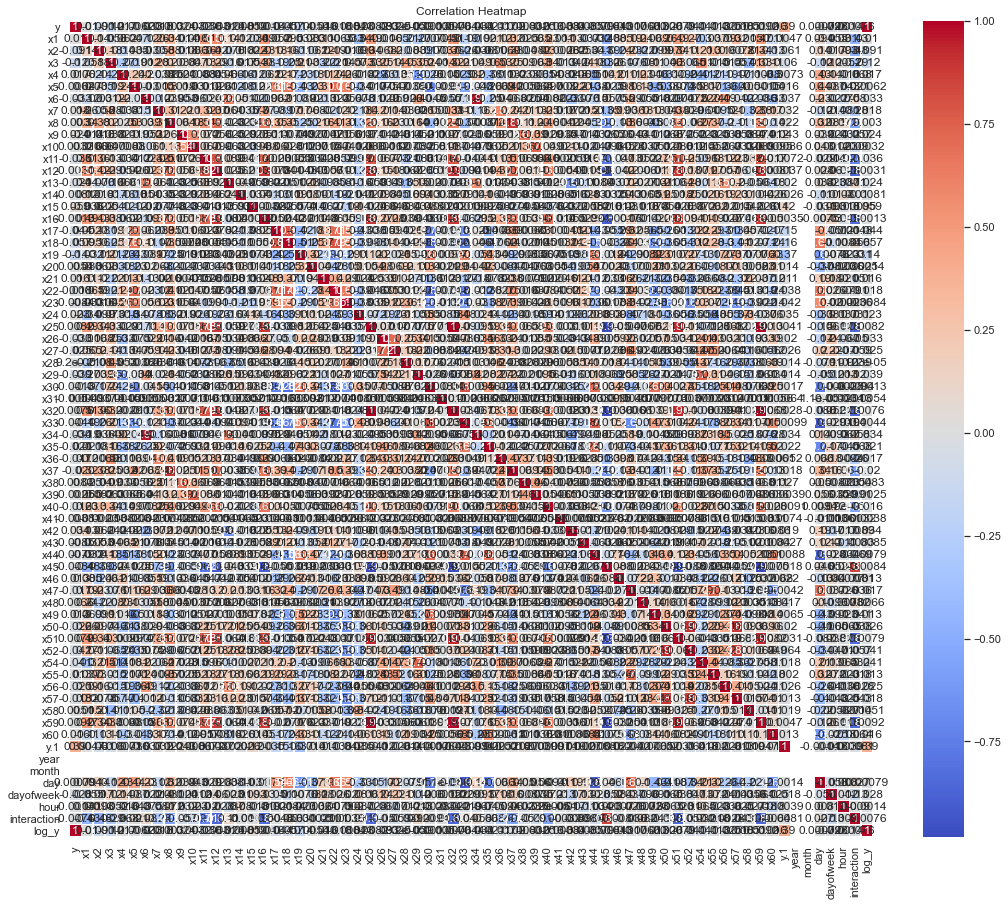

Selected features based on correlation:
 ['x3', 'x19', 'y.1', 'log_y']
         x3       x19  y.1  log_y
0 -4.095756  3.075199    0    0.0
1 -4.018359  3.075199    0    0.0
2 -4.353147  3.075199    0    0.0
3 -4.023612  3.075199    0    0.0
4 -4.333150  3.075199    0    0.0
0    0
1    0
2    0
3    0
4    0
Name: y, dtype: int64


In [49]:
# Correlation Matrix to check the relationship between features
plt.figure(figsize=(18, 15))
correlation_matrix = data.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

# Selecting features with high correlation to target variable 'y'
correlation_threshold = 0.1
selected_features = correlation_matrix[abs(correlation_matrix['y']) > correlation_threshold].index.tolist()

# Remove the target variable from the selected features
selected_features.remove('y')

print("Selected features based on correlation:\n", selected_features)

# Prepare the final dataset for modeling
X = data[selected_features]
y = data['y']

# Display the first few rows of the final dataset
print(X.head())
print(y.head())


In [50]:
# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Verify the shapes of the train and test sets
print(f"Train set: X_train shape = {X_train.shape}, y_train shape = {y_train.shape}")
print(f"Test set: X_test shape = {X_test.shape}, y_test shape = {y_test.shape}")

# Initialize a model (example: RandomForestRegressor)
model = RandomForestRegressor(random_state=42)

# Apply cross-validation to find the best split
kf = KFold(n_splits=5, shuffle=True, random_state=42)
cv_scores = cross_val_score(model, X_train, y_train, cv=kf, scoring='r2')

print(f"Cross-validation R2 scores: {cv_scores}")
print(f"Mean R2 score: {np.mean(cv_scores)}")


Train set: X_train shape = (14718, 4), y_train shape = (14718,)
Test set: X_test shape = (3680, 4), y_test shape = (3680,)
Cross-validation R2 scores: [1. 1. 1. 1. 1.]
Mean R2 score: 1.0


In [52]:
# Train the model on the entire training set
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

## Calculate evaluation metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)
mape = mean_absolute_percentage_error(y_test, y_pred)

print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R-squared (R2): {r2}")
print(f"Mean Absolute Percentage Error (MAPE): {mape}")


Mean Absolute Error (MAE): 0.0
Mean Squared Error (MSE): 0.0
Root Mean Squared Error (RMSE): 0.0
R-squared (R2): 1.0
Mean Absolute Percentage Error (MAPE): 0.0


In [54]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

models = {
    'Random Forest': RandomForestClassifier(),
    'Logistic Regression': LogisticRegression()
}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f'{name} Accuracy: {accuracy}')
    print(classification_report(y_test, y_pred))


Random Forest Accuracy: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3658
           1       1.00      1.00      1.00        22

    accuracy                           1.00      3680
   macro avg       1.00      1.00      1.00      3680
weighted avg       1.00      1.00      1.00      3680

Logistic Regression Accuracy: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3658
           1       1.00      1.00      1.00        22

    accuracy                           1.00      3680
   macro avg       1.00      1.00      1.00      3680
weighted avg       1.00      1.00      1.00      3680



In [55]:
best_model = RandomForestClassifier()
best_model.fit(X_train, y_train)

# Predict on the test set
y_pred = best_model.predict(X_test)


In [56]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

confusion_mat = confusion_matrix(y_test, y_pred)
print(f'Confusion Matrix:\n{confusion_mat}')

classification_rep = classification_report(y_test, y_pred)
print(f'Classification Report:\n{classification_rep}')


Accuracy: 1.0
Confusion Matrix:
[[3658    0]
 [   0   22]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3658
           1       1.00      1.00      1.00        22

    accuracy                           1.00      3680
   macro avg       1.00      1.00      1.00      3680
weighted avg       1.00      1.00      1.00      3680



In [60]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

# Define the parameter grid
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Initialize the model
rf = RandomForestClassifier(random_state=42)

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, 
                           cv=5, scoring='accuracy', verbose=1, n_jobs=-1)

# Fit GridSearchCV
grid_search.fit(X_train, y_train)

# Print the best parameters and best score
print("Best Parameters found: ", grid_search.best_params_)
print("Best Accuracy found: ", grid_search.best_score_)


Fitting 5 folds for each of 81 candidates, totalling 405 fits
Best Parameters found:  {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 50}
Best Accuracy found:  1.0


In [66]:
best_rf = grid_search.best_estimator_
best_rf.fit(X_train, y_train)
y_pred_tuned = best_rf.predict(X_test)

# Assess performance
accuracy_tuned = accuracy_score(y_test, y_pred_tuned)
print(f'Tuned Model Accuracy: {accuracy_tuned}')


Tuned Model Accuracy: 1.0


In [67]:
import joblib

# Assuming best_rf is your trained model
joblib.dump(best_rf, 'trained_model.pkl')


['trained_model.pkl']

In [69]:
# Save the trained model
joblib.dump(model, 'trained_model.pkl')


['trained_model.pkl']

In [70]:
# Load the model from file
loaded_model = joblib.load('trained_model.pkl')


In [75]:


# Read the exzcel file
new_data = pd.read_excel('AnomaData.xlsx')

# Display the first few rows of the DataFrame
print(new_data.head())


                 time  y        x1        x2        x3         x4        x5  \
0 1999-05-01 00:00:00  0  0.376665 -4.596435 -4.095756  13.497687 -0.118830   
1 1999-05-01 00:02:00  0  0.475720 -4.542502 -4.018359  16.230659 -0.128733   
2 1999-05-01 00:04:00  0  0.363848 -4.681394 -4.353147  14.127997 -0.138636   
3 1999-05-01 00:06:00  0  0.301590 -4.758934 -4.023612  13.161566 -0.148142   
4 1999-05-01 00:08:00  0  0.265578 -4.749928 -4.333150  15.267340 -0.155314   

          x6        x7        x8  ...        x51        x52       x54  \
0 -20.669883  0.000732 -0.061114  ...  29.984624  10.091721 -4.936434   
1 -18.758079  0.000732 -0.061114  ...  29.984624  10.095871 -4.937179   
2 -17.836632  0.010803 -0.061114  ...  29.984624  10.100265 -4.937924   
3 -18.517601  0.002075 -0.061114  ...  29.984624  10.104660 -4.938669   
4 -17.505913  0.000732 -0.061114  ...  29.984624  10.109054 -4.939414   

         x55        x56       x57       x58       x59       x60  y.1  
0 -24.590146  1

In [80]:

# Check the shape (rows, columns) of the DataFrame
print(f'Data shape: {new_data.shape}')

# Check column names
print(f'Column names: {new_data.columns}')

# Check data types of columns
print(f'Data types:\n{new_data.dtypes}')



Data shape: (18398, 62)
Column names: Index(['time', 'y', 'x1', 'x2', 'x3', 'x4', 'x5', 'x6', 'x7', 'x8', 'x9',
       'x10', 'x11', 'x12', 'x13', 'x14', 'x15', 'x16', 'x17', 'x18', 'x19',
       'x20', 'x21', 'x22', 'x23', 'x24', 'x25', 'x26', 'x27', 'x28', 'x29',
       'x30', 'x31', 'x32', 'x33', 'x34', 'x35', 'x36', 'x37', 'x38', 'x39',
       'x40', 'x41', 'x42', 'x43', 'x44', 'x45', 'x46', 'x47', 'x48', 'x49',
       'x50', 'x51', 'x52', 'x54', 'x55', 'x56', 'x57', 'x58', 'x59', 'x60',
       'y.1'],
      dtype='object')
Data types:
time    datetime64[ns]
y                int64
x1             float64
x2             float64
x3             float64
             ...      
x57            float64
x58            float64
x59            float64
x60            float64
y.1              int64
Length: 62, dtype: object


In [96]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler

# Load the dataset
file_path = 'AnomaData.xlsx'
data = pd.read_excel(file_path)

# Display the first few rows of the dataset
print(data.head())

# Data Preprocessing
# Identify numerical and datetime columns
numerical_cols = data.select_dtypes(include=['int64', 'float64']).columns
datetime_cols = data.select_dtypes(include=['datetime64']).columns

# Convert datetime columns to numerical features (e.g., year, month, day)
for col in datetime_cols:
    data[col + '_year'] = data[col].dt.year
    data[col + '_month'] = data[col].dt.month
    data[col + '_day'] = data[col].dt.day

# Drop original datetime columns
data = data.drop(columns=datetime_cols)

# Assuming the last column is the target variable and the rest are features
X = data.iloc[:, :-1]
y = data.iloc[:, -1]

# Standardize the numerical features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Train the model
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy * 100:.2f}%')

# Detailed classification report
print(classification_report(y_test, y_pred))

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print('Confusion Matrix:')
print(conf_matrix)


                 time  y        x1        x2        x3         x4        x5  \
0 1999-05-01 00:00:00  0  0.376665 -4.596435 -4.095756  13.497687 -0.118830   
1 1999-05-01 00:02:00  0  0.475720 -4.542502 -4.018359  16.230659 -0.128733   
2 1999-05-01 00:04:00  0  0.363848 -4.681394 -4.353147  14.127997 -0.138636   
3 1999-05-01 00:06:00  0  0.301590 -4.758934 -4.023612  13.161566 -0.148142   
4 1999-05-01 00:08:00  0  0.265578 -4.749928 -4.333150  15.267340 -0.155314   

          x6        x7        x8  ...        x51        x52       x54  \
0 -20.669883  0.000732 -0.061114  ...  29.984624  10.091721 -4.936434   
1 -18.758079  0.000732 -0.061114  ...  29.984624  10.095871 -4.937179   
2 -17.836632  0.010803 -0.061114  ...  29.984624  10.100265 -4.937924   
3 -18.517601  0.002075 -0.061114  ...  29.984624  10.104660 -4.938669   
4 -17.505913  0.000732 -0.061114  ...  29.984624  10.109054 -4.939414   

         x55        x56       x57       x58       x59       x60  y.1  
0 -24.590146  1

In [101]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler

# Load the dataset
file_path = 'AnomaData.xlsx'
data = pd.read_excel(file_path)

# Display the first few rows of the dataset
print(data.head())

# Data Preprocessing
# Identify numerical and datetime columns
numerical_cols = data.select_dtypes(include=['int64', 'float64']).columns
datetime_cols = data.select_dtypes(include=['datetime64']).columns

# Convert datetime columns to numerical features (e.g., year, month, day)
for col in datetime_cols:
    data[col + '_year'] = data[col].dt.year
    data[col + '_month'] = data[col].dt.month
    data[col + '_day'] = data[col].dt.day

# Drop original datetime columns
data = data.drop(columns=datetime_cols)

# Assuming the last column is the target variable and the rest are features
X = data.iloc[:, :-1]
y = data.iloc[:, -1]

# Ensure all features are numerical
X = X.apply(pd.to_numeric)

# Standardize the numerical features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Hyperparameter tuning using GridSearchCV
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

grid_search = GridSearchCV(estimator=RandomForestClassifier(random_state=42), param_grid=param_grid, cv=3, n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)

# Best parameters from GridSearchCV
best_params = grid_search.best_params_
print(f'Best parameters found: {best_params}')

# Train the model with the best parameters
best_model = grid_search.best_estimator_

# Predict on the test set
y_pred = best_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy * 100:.2f}%')

# Detailed classification report
print(classification_report(y_test, y_pred))

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print('Confusion Matrix:')
print(conf_matrix)


                 time  y        x1        x2        x3         x4        x5  \
0 1999-05-01 00:00:00  0  0.376665 -4.596435 -4.095756  13.497687 -0.118830   
1 1999-05-01 00:02:00  0  0.475720 -4.542502 -4.018359  16.230659 -0.128733   
2 1999-05-01 00:04:00  0  0.363848 -4.681394 -4.353147  14.127997 -0.138636   
3 1999-05-01 00:06:00  0  0.301590 -4.758934 -4.023612  13.161566 -0.148142   
4 1999-05-01 00:08:00  0  0.265578 -4.749928 -4.333150  15.267340 -0.155314   

          x6        x7        x8  ...        x51        x52       x54  \
0 -20.669883  0.000732 -0.061114  ...  29.984624  10.091721 -4.936434   
1 -18.758079  0.000732 -0.061114  ...  29.984624  10.095871 -4.937179   
2 -17.836632  0.010803 -0.061114  ...  29.984624  10.100265 -4.937924   
3 -18.517601  0.002075 -0.061114  ...  29.984624  10.104660 -4.938669   
4 -17.505913  0.000732 -0.061114  ...  29.984624  10.109054 -4.939414   

         x55        x56       x57       x58       x59       x60  y.1  
0 -24.590146  1

C:\Users\91877\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:666: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=3.
  warnings.warn(("The least populated class in y has only %d"


Best parameters found: {'bootstrap': True, 'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 100}
Accuracy: 99.86%
              precision    recall  f1-score   support

           1       1.00      1.00      1.00       130
           2       1.00      1.00      1.00       127
           3       1.00      1.00      1.00       130
           4       1.00      1.00      1.00        87
           5       1.00      1.00      1.00       141
           6       1.00      1.00      1.00       132
           7       1.00      1.00      1.00       131
           8       1.00      1.00      1.00       144
           9       1.00      1.00      1.00       141
          10       1.00      1.00      1.00       143
          11       1.00      1.00      1.00       133
          12       1.00      1.00      1.00       143
          13       1.00      0.99      1.00       141
          14       0.99      1.00      1.00       144
          15       1.00      1.00      1.00 